# CSV 파일 읽어서 그래프 그리기

몬트리올의 7개의 자전거길의 하루 이용객 데이터 사용

In [2]:
# render plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# make the graphs a bit prettier and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
broken_df = pd.read_csv('./files/bikes.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 15: invalid continuation byte

In [5]:
broken_df = pd.read_csv('./files/bikes.csv', encoding='ISO-8859-1')
broken_df[:3]

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


읽은 파일의 데이터가 깔끔하지 않음

=> 아래와 같이 변경
- column separator를 ';'로 변경(기본값은 ',')
- encoding을 'latin1'로 변경
- 'Date' column을 index로 생성
- 'Date' column은 dates 형식으로 parsing

In [9]:
fixed_df = pd.read_csv('./files/bikes.csv', sep=';', encoding='latin1', index_col='Date', parse_dates=['Date'], dayfirst=True)
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


In [10]:
fixed_df.describe()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
count,310.000000,0.0,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,0.0
mean,2985.048387,NaN,1233.351613,1983.325806,3510.261290,1862.983871,1054.306452,2873.483871,NaN
std,2169.271062,NaN,944.643188,1450.715170,2484.959789,1332.543266,1064.029205,2039.315504,NaN
min,32.000000,NaN,0.000000,33.000000,47.000000,18.000000,0.000000,0.000000,NaN
25%,596.000000,NaN,243.250000,427.000000,831.000000,474.750000,53.250000,731.000000,NaN
50%,3128.000000,NaN,1269.000000,2019.500000,3688.500000,1822.500000,704.000000,3223.500000,NaN
75%,4973.250000,NaN,2003.000000,3168.250000,5731.750000,3069.000000,1818.500000,4717.250000,NaN
max,7077.000000,NaN,3124.000000,4999.000000,8222.000000,4510.000000,4386.000000,6595.000000,NaN


In [12]:
fixed_df[['Berri 1', 'Rachel1']]

,Berri 1,Rachel1
Date,,
2012-01-01,35,16
2012-01-02,83,43
2012-01-03,135,58
2012-01-04,144,61
2012-01-05,197,95
...,...,...
2012-11-01,2405,2461
2012-11-02,1582,1888
2012-11-03,844,1302


<AxesSubplot:xlabel='Date'>

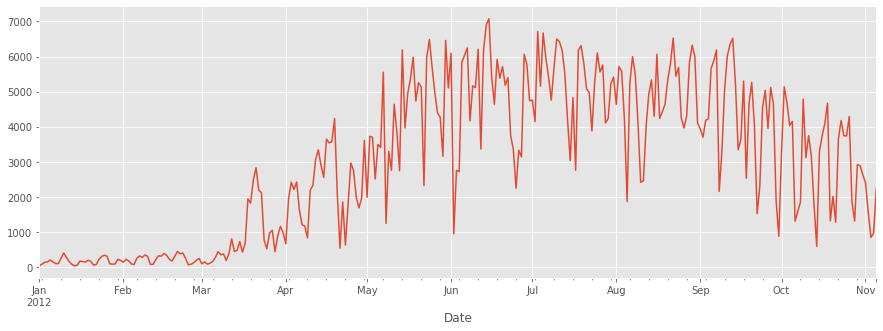

In [13]:
fixed_df['Berri 1'].plot()

<AxesSubplot:xlabel='Date'>

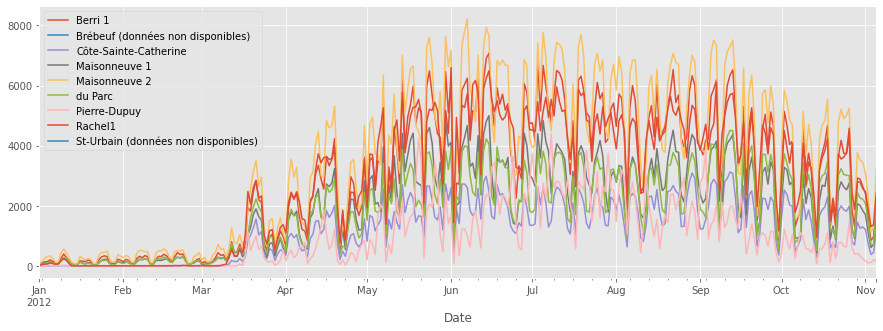

In [14]:
fixed_df.plot()